### Student Information
Name: Mequanent Argaw

Student ID: 110761504

GitHub ID: https://github.com/mequanent

---

### Instructions

1. First: do the **take home** exercises in Part 1 of the [SNHC7450-Lab2-master Repo](https://github.com/fhcalderon87/SNHC7450_Lab2_master/blob/main/SNHC4750_Lab2_master.ipynb). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [SNHC7450-Lab2-master Repo](https://github.com/fhcalderon87/SNHC7450_Lab2_master/blob/main/SNHC4750_Lab2_master.ipynb) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 40% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and/or textbooks for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generat a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


Create a new repository on Github and upload your homework to it. Submit a link to the repository to my email __BEFORE the deadline (Dec. 27th 11:59 pm, Monday)__. 

In [1]:
### Begin Assignment Here

# Answers for Instruction 1

# Part 1

In [43]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import numpy as np
import pandas as pd
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

## ** >>> Exercise 1 (5 min): **

In [5]:
# Answer here
compGraphics = X.loc[X['category_name'] == 'comp.graphics']
compGraphics.loc[::10, :][0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics
172,From: thinman@netcom.com (Technically Sweet) S...,1,comp.graphics


## >>> Exercise 2 (take home)

###### Answer here
As we can see from the definition of pandas.isnull(obj) method, it returns True if obj is NaN for numeric, NaN or None for objects and NaT for datetime objects. Other values including 'NaN', 'None' and '' are considered as valid values and returns as the cell is not null.

In [7]:
X_sample = X.sample(n=1000)

## >>> Exercise 3 (take home):

                        category_name  category_name
soc.religion.christian            599            277
sci.med                           594            266
comp.graphics                     584            261
alt.atheism                       480            196


<AxesSubplot:title={'center':'Category distribution'}>

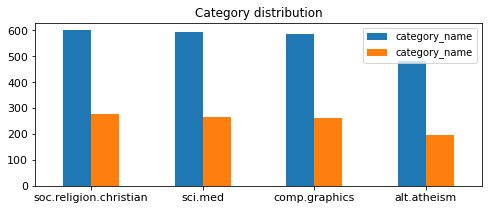

In [8]:
# Answer here
# Create one dataframe from the two category distributions then plot it
df1 = X.category_name.value_counts().to_dict() # Changing the series into dictionary 
df2 = X_sample.category_name.value_counts().to_dict() # to access column names and values separately

data = [list(df1.values()), list(df2.values())] # counts in each category for the two dataframes
df = pd.DataFrame(data, columns = list(df1.keys())) # Categories are common for both df1 & df2
df = df.transpose()
df.columns = ["category_name", "category_name"]
print(df) # In case distributions may be closer each other, to indentify clearly

df.plot(kind = 'bar',title = 'Category distribution', rot = 0, fontsize = 11, figsize = (8,3))

In [10]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [12]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

## >>> Exercise 4 (5 min):

In [13]:
# Answer here
analyze(X.loc[0, 'text']) # Analyze only the text part of the first record

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

## >>> Exercise 5 (take home):

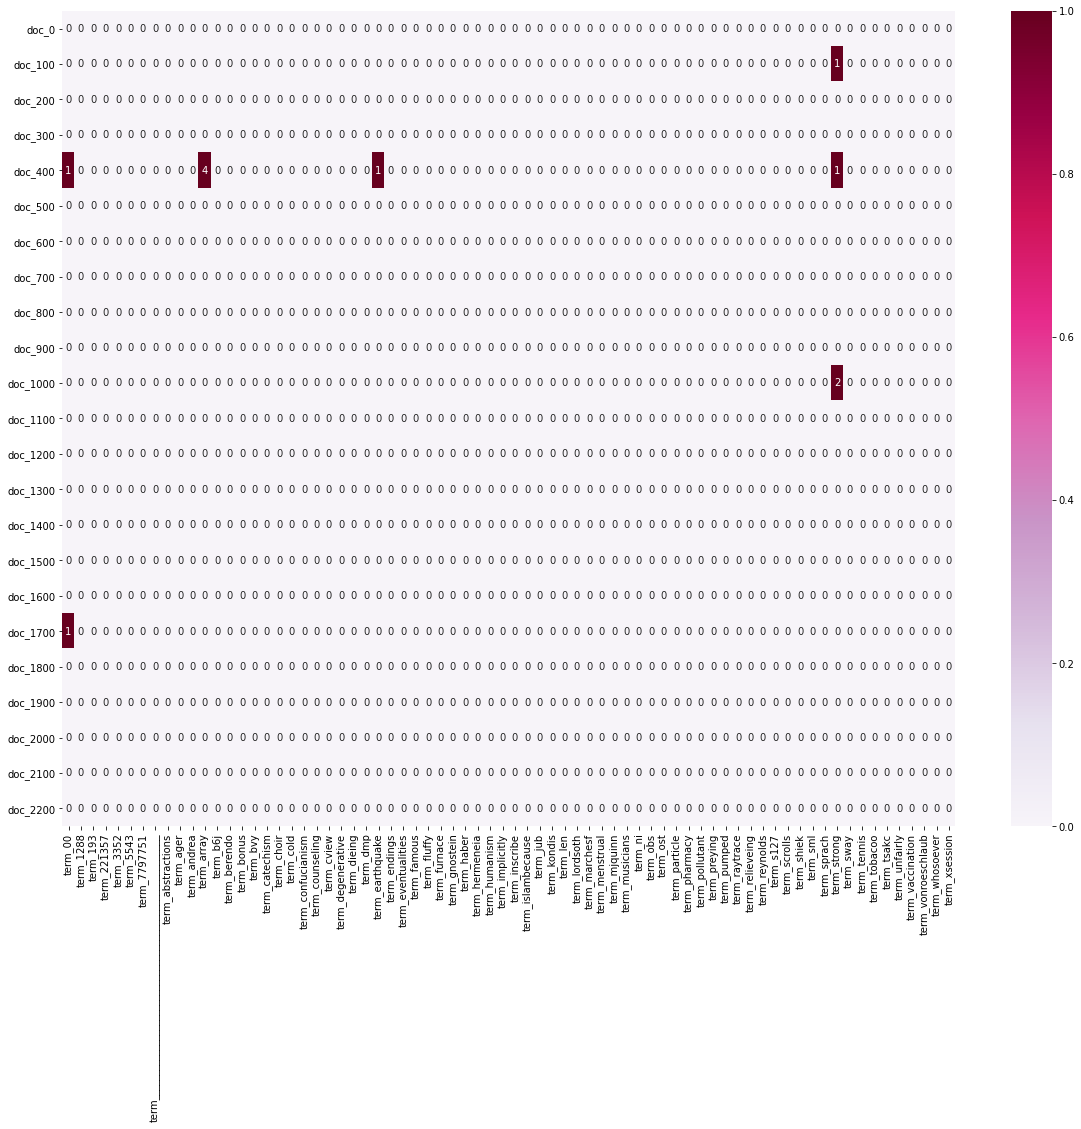

In [15]:
# Answer here
# Sample of documents at every 100th place and terms at every 500th place taken
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[::500]] # sample of terms
plot_y = ["doc_"+ str(i) for i in list(X.index)[::100]] # sample of documents
plot_z = X_counts[::100, ::500].toarray() # TF values for the sampled terms in the sampled docs

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## >>> Exercise 6 (take home):

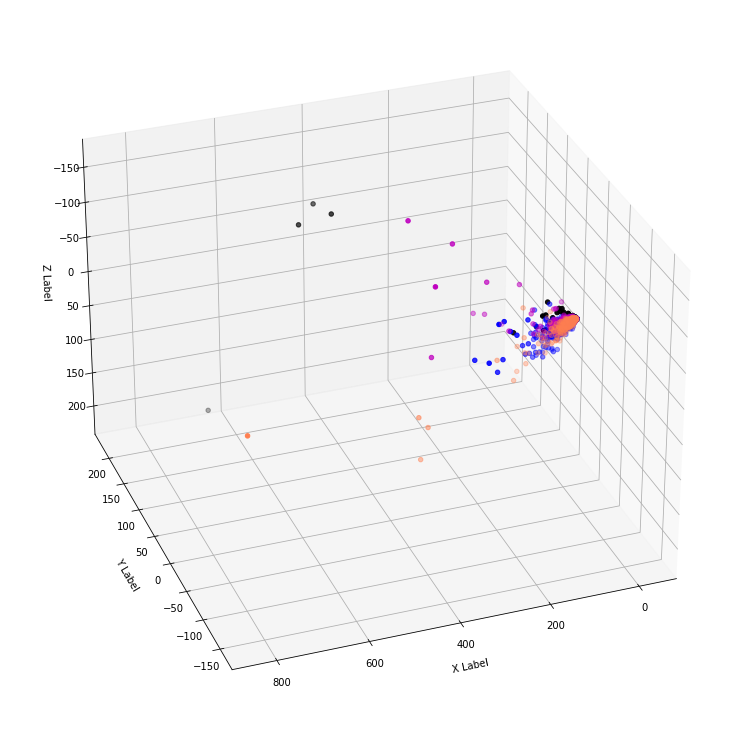

In [17]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray()) # X_reduced modfied to 2257x3

col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig, elev = -150, azim= 110)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2] # Third dimension added
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()

In [19]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

## >>> Exercise 6 (take home): 
    (There are two questions numbered as 6)

The number of most frequent words selected is: 180.000000


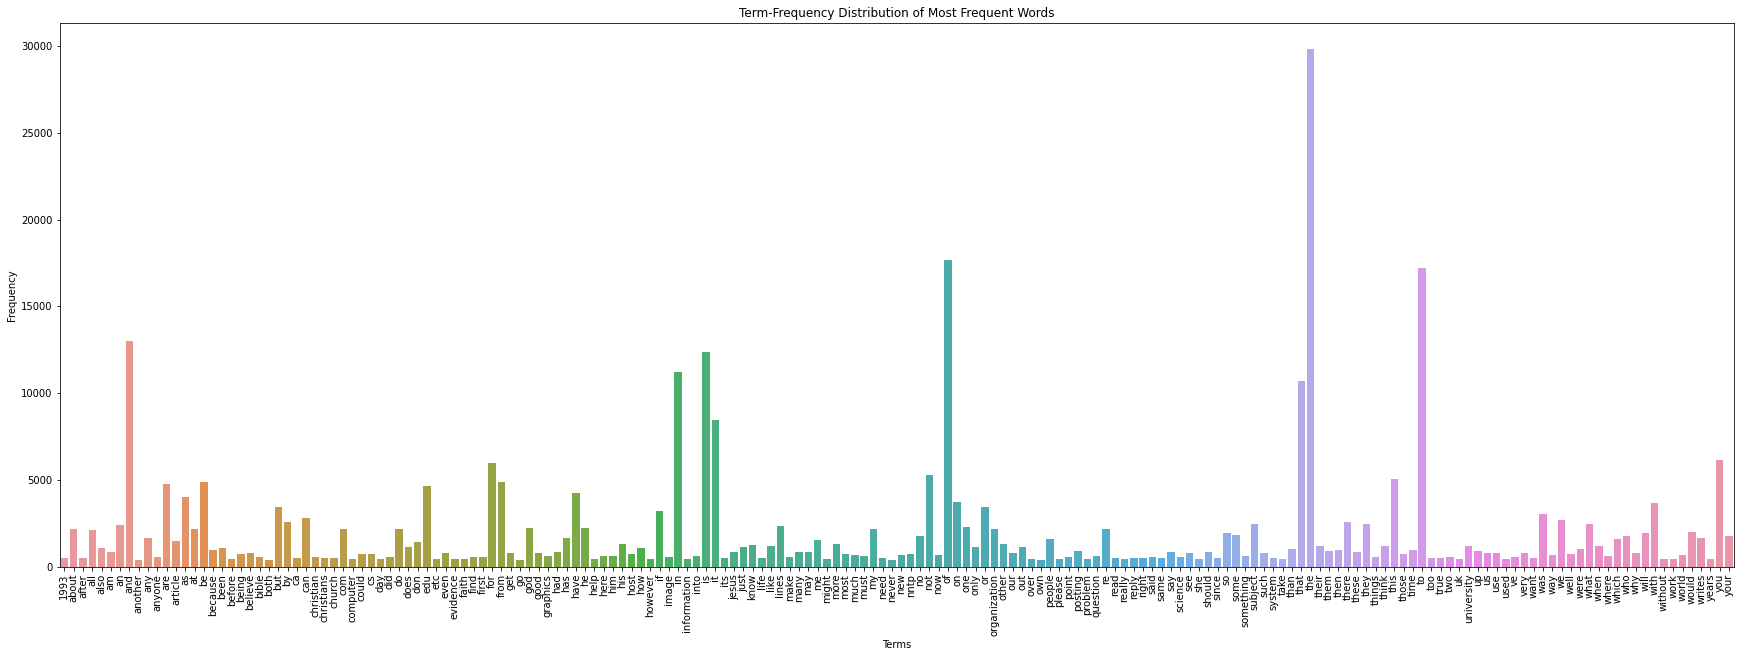

In [20]:
# Answer here
fig = plt.figure(figsize = (30,10))

# Zip the terms with their corresponding terms to get both in the same order
tf_dict = dict(zip(count_vect.get_feature_names_out(), term_frequencies)) 
tf_dict = dict((k, v) for k, v in tf_dict.items() if v > 400) # Select terms with frequencies > 400
print("The number of most frequent words selected is: %(x)f" %{"x":len(tf_dict)})

freqent_terms = pd.DataFrame(tf_dict.items(), columns = ['Terms', 'Frequencies'])

ax = sns.barplot(x = 'Terms', y = 'Frequencies', data = freqent_terms)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set(xlabel = 'Terms', ylabel = 'Frequency', title = 'Term-Frequency Distribution of Most Frequent Words')
plt.savefig('term frequency of tf greater than 400.png', dpi=300)

## >>> Exercise 7 (take home):

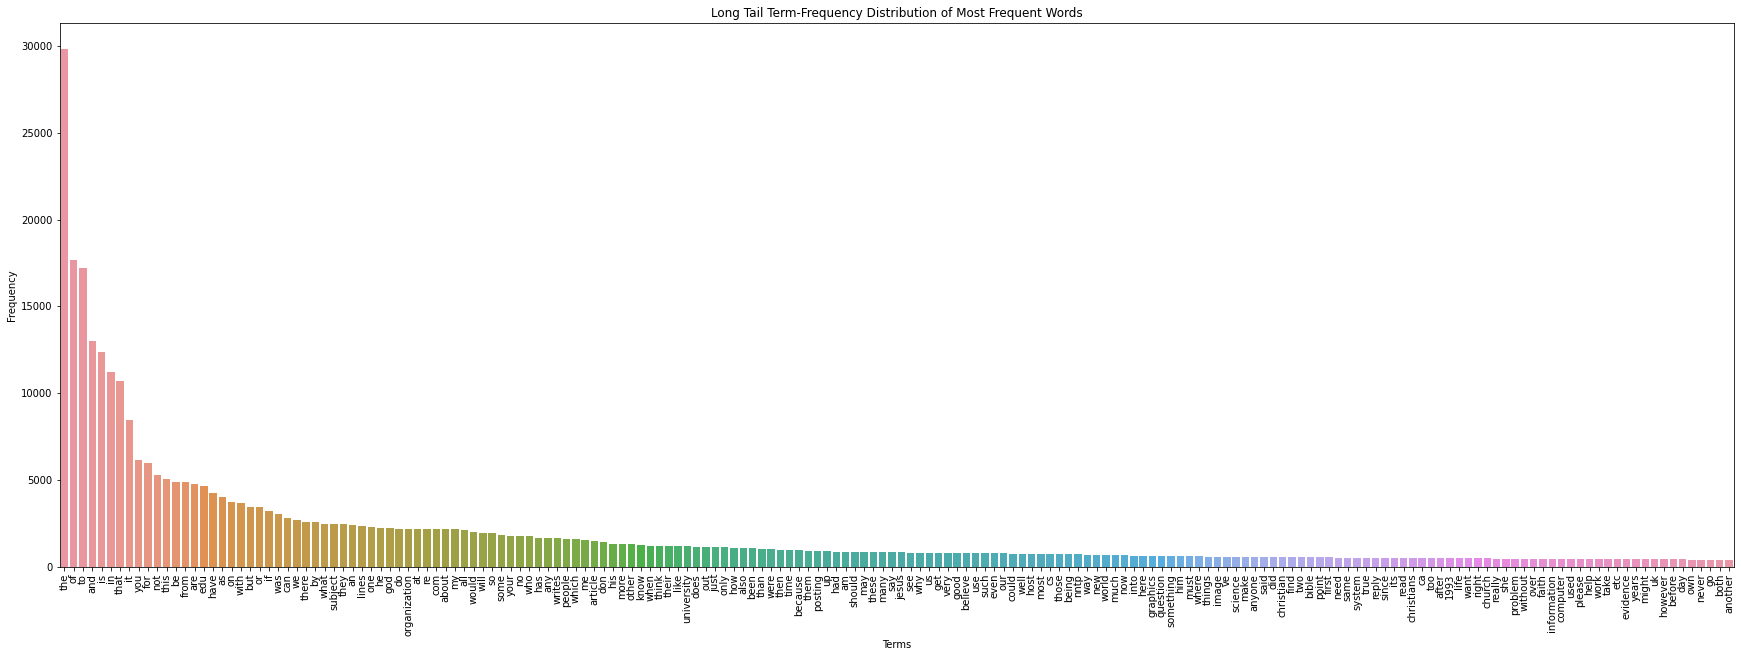

In [21]:
# Answer here
# Only the sorting part is different from the above exercise 6
fig = plt.figure(figsize = (30,10))
long_tail = freqent_terms.sort_values(["Frequencies"], ascending=False) # sort by descending tf

ax = sns.barplot(x = 'Terms', y = 'Frequencies', data = long_tail)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set(xlabel = 'Terms', ylabel = 'Frequency', title = 'Long Tail Term-Frequency Distribution of Most Frequent Words')
plt.savefig('long tail form of the term frequency.png', dpi=300) 

## I tried exercise 8 and hence brought a copy of some pre-requisite codes from the lab as shown below.


## To save time, just jump some parts typing "Exercise 8" on the search box.

#### Part 2. Neural Word Embeddings

In [22]:
### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [23]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [25]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
#train_df.head()

In [26]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [27]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [41]:
## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

labels = train_df['emotion'].unique()

In [30]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [31]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [32]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils # np_utils for newer versions of tensorflow and keras

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3261    sadness
1153       fear
2591        joy
3164    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [33]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [34]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 4s 10ms/step - loss: 1.3245 - accuracy: 0.3701 - val_loss: 1.2537 - val_accuracy: 0.4957
Epoch 2/25
113/113 [==============================] - 0s 4ms/step - loss: 0.9784 - accuracy: 0.6457 - val_loss: 0.9251 - val_accuracy: 0.6455
Epoch 3/25
113/113 [==============================] - 0s 4ms/step - loss: 0.5838 - accuracy: 0.7968 - val_loss: 0.7930 - val_accuracy: 0.6859
Epoch 4/25
113/113 [==============================] - 0s 4ms/step - loss: 0.4241 - accuracy: 0.8439 - val_loss: 0.8010 - val_accuracy: 0.6744
Epoch 5/25
113/113 [==============================] - 0s 4ms/step - loss: 0.3376 - accuracy: 0.8763 - val_loss: 0.8485 - val_accuracy: 0.6657
Epoch 6/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2797 - accuracy: 0.9017 - val_loss: 0.8834 - val_accuracy: 0.6715
Epoch 7/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.9231 - val_loss: 0.9334 - val_accuracy: 0.6945
Epoch 8/25
113/1

In [36]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[6.3434519e-02, 1.6436348e-02, 1.7944433e-06, 9.2012727e-01],
       [3.4102222e-06, 1.1323630e-07, 9.9999106e-01, 5.3973690e-06],
       [9.9970168e-01, 6.8031230e-05, 5.7130688e-07, 2.2963475e-04],
       [2.0365212e-03, 9.9173307e-01, 2.6886514e-03, 3.5417962e-03],
       [9.9999988e-01, 7.9587338e-08, 5.0211524e-10, 5.5971910e-08]],
      dtype=float32)

In [37]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'joy', 'anger', 'fear', 'anger'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.64


In [39]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
#training_log

## ** >>> Exercise 8 (Take home): **

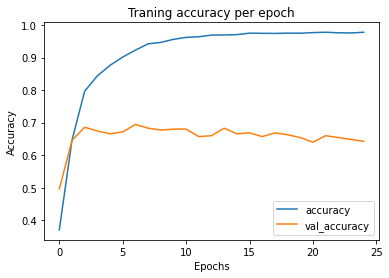

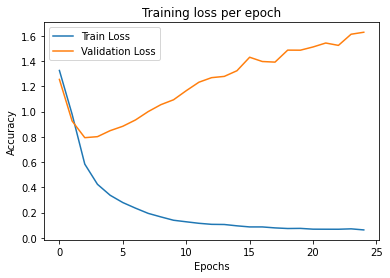

In [40]:
# Answer 
# Plot of training and validation accuracies
plt.plot(training_log.index, training_log['accuracy'], label='accuracy')
plt.plot(training_log.index, training_log['val_accuracy'],  label='val_accuracy')

plt.title('Traning accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot of training and validation losses
plt.plot(training_log.index, training_log['loss'], label='Train Loss')
plt.plot(training_log.index, training_log['val_loss'],  label='Validation Loss')
plt.title('Training loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Answers for Instruction 2

# Part 2

Dataset from: 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

In [246]:
#Read the datasets
amazon_data = pd.read_csv("data/sentiment_labelled_sentences/amazon_cells_labelled.txt",
                         sep="\t", header=None,names=["text", "score"])
imdb_data = pd.read_csv("data/sentiment_labelled_sentences/imdb_labelled.txt",
                         sep="\t", header=None,names=["text", "score"])
yelp_data = pd.read_csv("data/sentiment_labelled_sentences/yelp_labelled.txt",
                         sep="\t", header=None,names=["text", "score"])

In [247]:
# Check the shapes of each dataset
print(amazon_data.shape)
print(imdb_data.shape) 
print(yelp_data.shape)

(1000, 2)
(748, 2)
(1000, 2)


###### Instead of the helpers, I used the following code fragment to include category code and category name

In [248]:
# Add the types of the datasets as their corresponding categories
amazon_data["category"] = 1 # let this be 1; similary to others below 2 & 3
amazon_data["category_name"] = "AMAZON"

imdb_data["category"] = 2
imdb_data["category_name"] = "IMDB"

yelp_data["category"] = 3
yelp_data["category_name"] = "YELP"

# Re-check the shapes of each dataset
print(amazon_data.shape)
print(imdb_data.shape) 
print(yelp_data.shape)

(1000, 4)
(748, 4)
(1000, 4)


In [249]:
# combine the 3 sub-datasets
sentiment_data = pd.concat([amazon_data, imdb_data, yelp_data], ignore_index=True)
sentiment_data

,text,score,category,category_name
0,So there is no way for me to plug it in here i...,0,1,AMAZON
1,"Good case, Excellent value.",1,1,AMAZON
2,Great for the jawbone.,1,1,AMAZON
3,Tied to charger for conversations lasting more...,0,1,AMAZON
4,The mic is great.,1,1,AMAZON
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,3,YELP
2744,Appetite instantly gone.,0,3,YELP
2745,Overall I was not impressed and would not go b...,0,3,YELP
2746,"The whole experience was underwhelming, and I ...",0,3,YELP


In [96]:
len(sentiment_data.text)

2748

In [250]:
# chech for the existence of null values in the dataset.
sentiment_data.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [251]:
# shuffle dataset
index = sentiment_data.index # keep the index to use after shuffling
sentiment_data = sentiment_data.sample(frac=1)
sentiment_data.index = index # Set back the index to ordered values
sentiment_data.head()

,text,score,category,category_name
0,The only good thing was that it fits comfortab...,1,1,AMAZON
1,The Songs Were The Best And The Muppets Were S...,1,2,IMDB
2,My gyro was basically lettuce only.,0,3,YELP
3,This place is amazing!,1,3,YELP
4,It's a long time since I was so entertained by...,1,2,IMDB


## << Exercise 1's correspondence 
#### Return the amazon sell categories

In [104]:
amazon_sells = sentiment_data.loc[sentiment_data['category_name'] == 'AMAZON']
amazon_sells.loc[::10, :][0:5] # The first five rows from each tenth tuple

,text,score,category,category_name
0,I was looking for this headset for a long time...,1,1,AMAZON
23,Nice docking station for home or work.,1,1,AMAZON
41,Phone now holds charge like it did when it was...,1,1,AMAZON
77,I am sorry I made this purchase.,0,1,AMAZON
106,Just what I wanted.,1,1,AMAZON


##### Exercise 2 doesn't require to repeat since it is somewhat a statement

## Ex 3's Equivalence

In [105]:
S_sample = sentiment_data.sample(n=1000)

        category_name  category_name
AMAZON           1000            374
YELP             1000            367
IMDB              748            259


<AxesSubplot:title={'center':'The whole and sample data distribution'}>

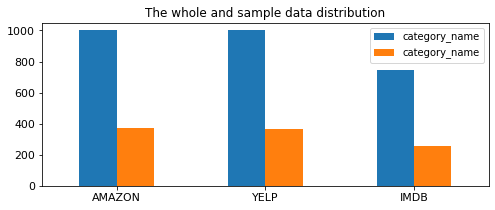

In [107]:
# Answer here No 3
# Create one dataframe from the two category distributions then plot it
df1 = sentiment_data.category_name.value_counts().to_dict() # Changing the series into dictionary 
df2 = S_sample.category_name.value_counts().to_dict() # to access column names and values separately

data = [list(df1.values()), list(df2.values())] # counts in each category for the two dataframes
df = pd.DataFrame(data, columns = list(df1.keys())) # Categories are common for both df1 & df2
df = df.transpose()
df.columns = ["category_name", "category_name"]
print(df) # In case distributions may be closer each other, to indentify clearly

df.plot(kind = 'bar',title = 'The whole and sample data distribution', rot = 0, fontsize = 11, figsize = (8,3))

## Exercise 4's Equivalent follows

In [108]:
# takes a like a minute or two to process
sentiment_data['unigrams'] = sentiment_data['text'].apply(lambda x: dmh.tokenize_text(x))

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
sentiment_data_counts = count_vect.fit_transform(sentiment_data.text)

In [110]:
analyze = count_vect.build_analyzer()

In [111]:
# Answer here 
# This is the equivalent of exercise 4 in the take home
analyze(sentiment_data.loc[0, 'text']) # Analyze only the text part of the first record

['was',
 'looking',
 'for',
 'this',
 'headset',
 'for',
 'long',
 'time',
 'and',
 'now',
 'that',
 've',
 'got',
 'it',
 'couldn',
 'be',
 'happier']

## Exercise 5's Equivalent follows

In [113]:
sentiment_data_counts.shape

(2748, 5155)

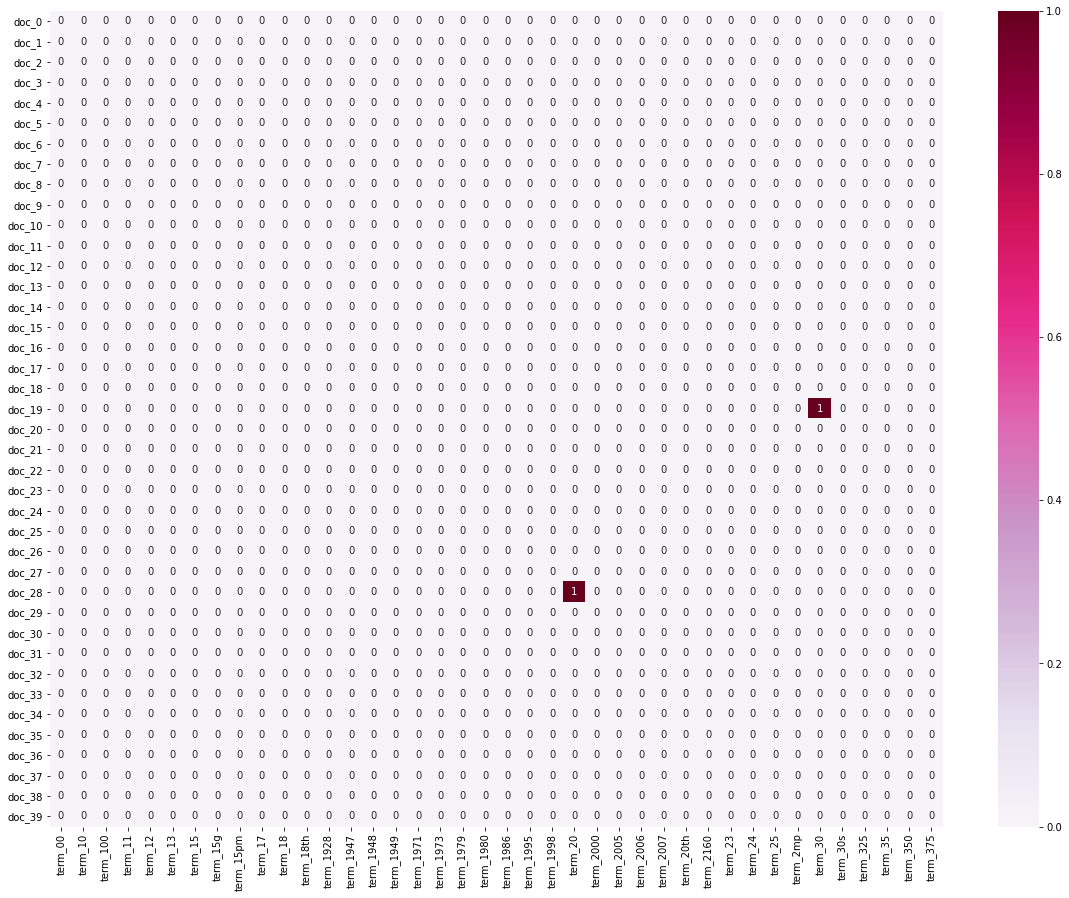

In [124]:
# Answer here 
# This is the equivalent of exercise 5 in the take home; a second trial
# Sample of the first 40 documents 
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:40]] # sample of terms
plot_y = ["doc_"+ str(i) for i in list(sentiment_data.index)[0:40]] # sample of documents
plot_z = sentiment_data_counts[0:40, 0:40].toarray() # TF values for the sampled terms in the sampled docs

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [116]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
sentiment_tf = []
for j in range(0,sentiment_data_counts.shape[1]):
    sentiment_tf.append(sum(sentiment_data_counts[:,j].toarray()))
    
sentiment_tf = np.asarray(sentiment_data_counts.sum(axis=0))[0]

## Exercise 6's Equivalent follows

The number of most frequent words selected is: 47.000000


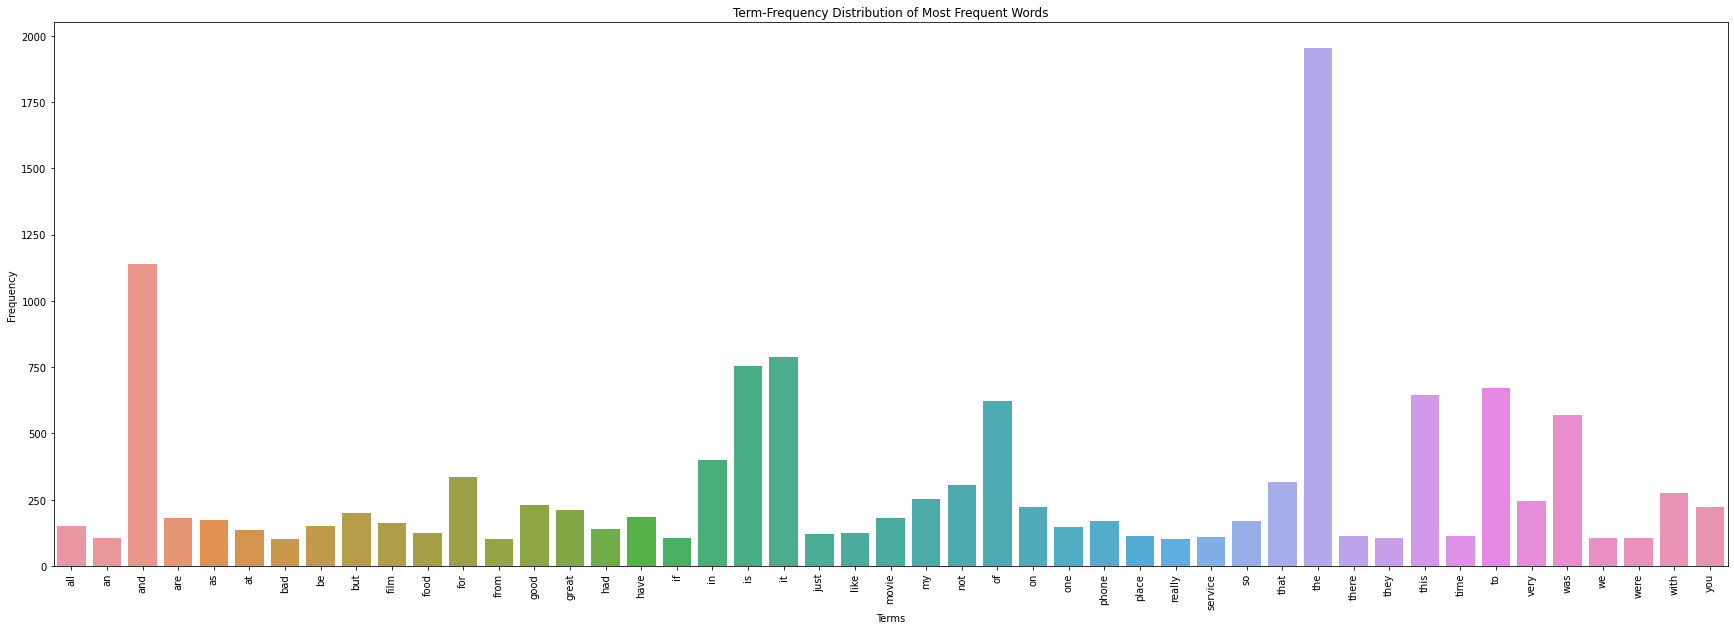

In [122]:
# Answer here 
# This is the equivalent of exercise 6 in the take home;
fig = plt.figure(figsize = (30,10))

# Zip the terms with their corresponding terms to get both in the same order
tf_dict = dict(zip(count_vect.get_feature_names_out(), sentiment_tf)) 
tf_dict = dict((k, v) for k, v in tf_dict.items() if v > 100) # Select terms with frequencies > 100
print("The number of most frequent words selected is: %(x)f" %{"x":len(tf_dict)})

freqent_terms = pd.DataFrame(tf_dict.items(), columns = ['Terms', 'Frequencies'])

ax = sns.barplot(x = 'Terms', y = 'Frequencies', data = freqent_terms)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set(xlabel = 'Terms', ylabel = 'Frequency', title = 'Term-Frequency Distribution of Most Frequent Words')
plt.savefig('term frequency of tf greater than 100.png', dpi=300)

## Exercise 7's Equivalent follows

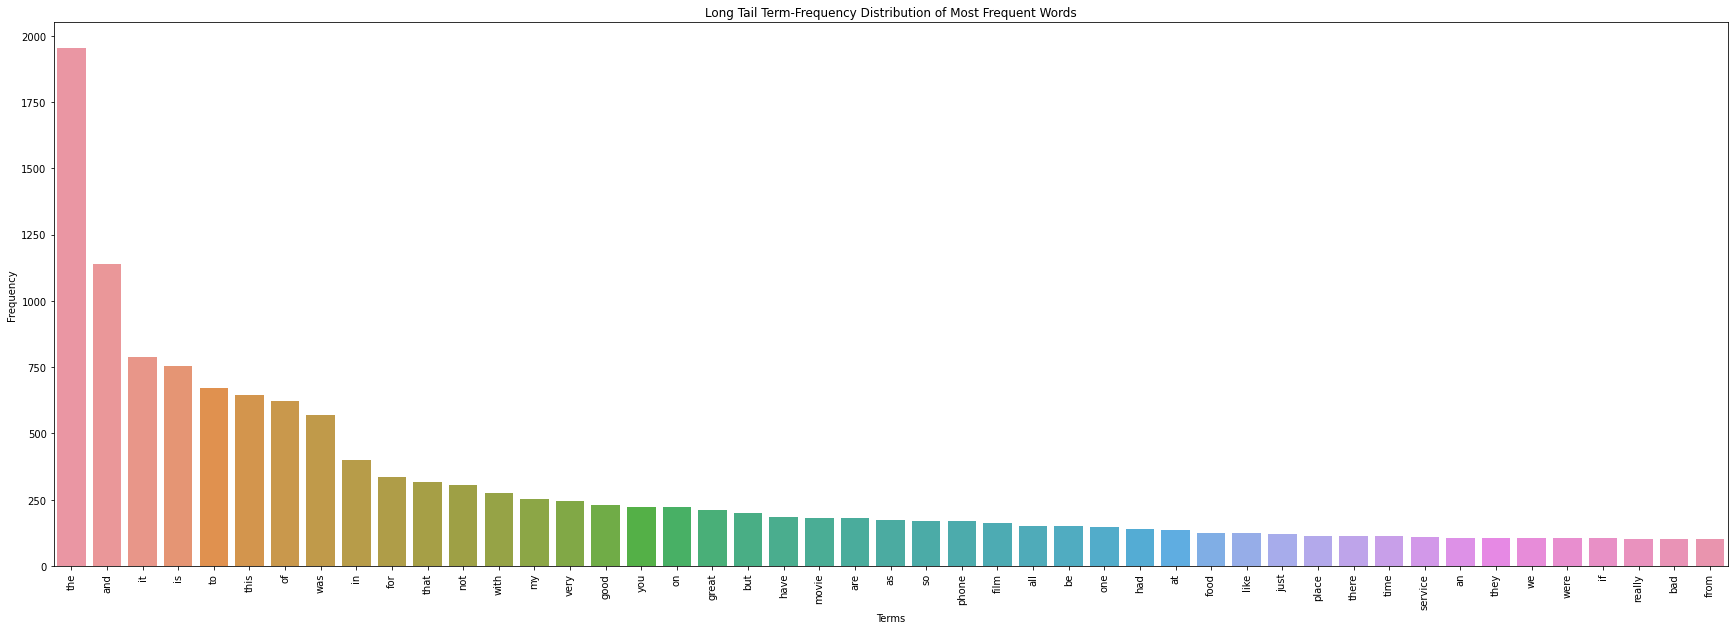

In [123]:
# Answer here 
# This is the equivalent of exercise 7 in the take home;
# Only the sorting part is different from the above exercise 6
fig = plt.figure(figsize = (30,10))
long_tail = freqent_terms.sort_values(["Frequencies"], ascending=False) # sort by descending tf

ax = sns.barplot(x = 'Terms', y = 'Frequencies', data = long_tail)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set(xlabel = 'Terms', ylabel = 'Frequency', title = 'Long Tail Term-Frequency Distribution of Most Frequent Words')
plt.savefig('long tail form of the term frequency.png', dpi=300) 

# Answers for Instruction 3

# Part 3

## << Naive Bayes with TFIDF feature vector

In [206]:
# Separate the label from the other features
x = sentiment_data.loc[:, ['text', 'category', 'category_name']]
y = sentiment_data.loc[:, 'score']

In [207]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [299]:
print(x_train.shape)
print(x_test.shape)
x_train.head()

(2198, 3)
(550, 3)


,text,category,category_name
1670,For readers who have already seen one of Miyaz...,2,IMDB
2487,The kids play area is NASTY!,3,YELP
1124,I have had problems wit hit dropping signal an...,1,AMAZON
2480,What a piece of junk.. I lose more calls on th...,1,AMAZON
480,Best breakfast buffet!!!,3,YELP


### Let me do the new data visualization required using altair
-->I got altair when checking for another data visualization tool which have not used before.

I would like to see the distribution of the score of the training and testing datasets.

In [300]:
#To visualize with their scores, I have to merge the datasets with their scores
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

###### Score Distribution of the training data

In [314]:
import altair as alt
#alt.renderers.enable('notebook')

In [317]:
bars = alt.Chart(train).mark_bar().encode(
    x='sum(category):Q',
    y='score:O',
    color='category_name:N',
    row='category_name:N'
)
bars

alt.Chart(...)

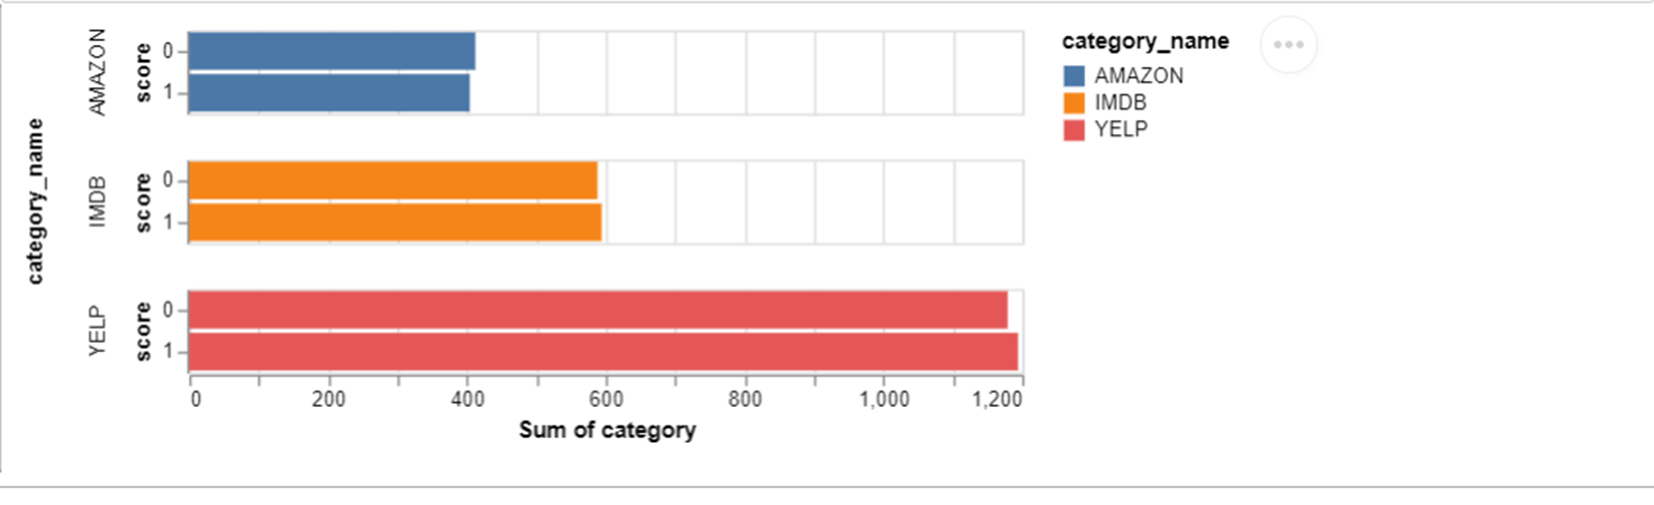

## The altair plots failed to be committed into github and I attached here their screenshots.

###### Score Distribution of the testing data

In [310]:
bars = alt.Chart(test).mark_bar().encode(
    x='sum(category):Q',
    y='score:O',
    color='category_name:N',
    row='category_name:N'
)
bars

alt.Chart(...)

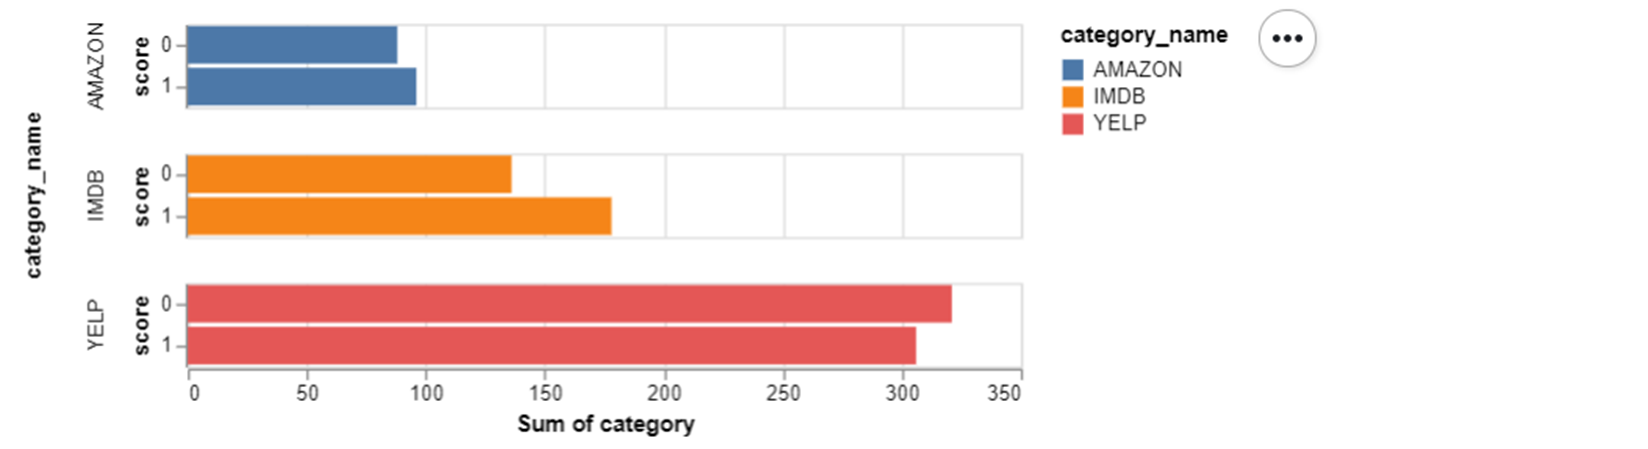

## TFIDF feature vector for Naive Bayes classifier

In [203]:
# import the libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [227]:
# Create the tfidf vectorizer object to generete the tfidf vectors of the training and testing data
tfidf_vect = TfidfVectorizer() 

x_train_tfidf = tfidf_vect.fit_transform(x_train.text)# get tfidf values of the training data
x_test_tfidf = tfidf_vect.transform(x_test.text) # get tfidf values of the testing data

#### Create the Naive Bayes model and train it.

In [239]:
tfidf_mnb = MultinomialNB() # create a multinomial N.B model for non-binary vectors
tfidf_mnb.fit(x_train_tfidf, y_train) # train the model

MultinomialNB()

#### Evaluate the model with the testing dataset

In [240]:
tfidf_mnb.score(x_test_tfidf, y_test) # See the accuracy of the model on the testing data

0.8090909090909091

## << Naive Bayes with Count Vectors as features 

In [241]:
# Building Naive Bayes with the term frequency
x_train_counts = count_vect.fit_transform(x_train.text) # count vector of the training data
x_test_counts = count_vect.transform(x_test.text) # count vector of the testing data

tf_mnb = MultinomialNB()
tf_mnb.fit(x_train_counts, y_train)
tf_mnb.score(x_test_counts, y_test)

0.8

###### Based on the scores observed, there is no significant difference. The tfidf part achieved a bit better accuracy.

-----

#### Appendix
Score distribution of the sentiment dataset with altair

In [312]:
bars = alt.Chart(sentiment_data).mark_bar().encode(
    x='sum(category):Q',
    y='score:O',
    color='category_name:N',
    row='category_name:N'
)
bars

alt.Chart(...)

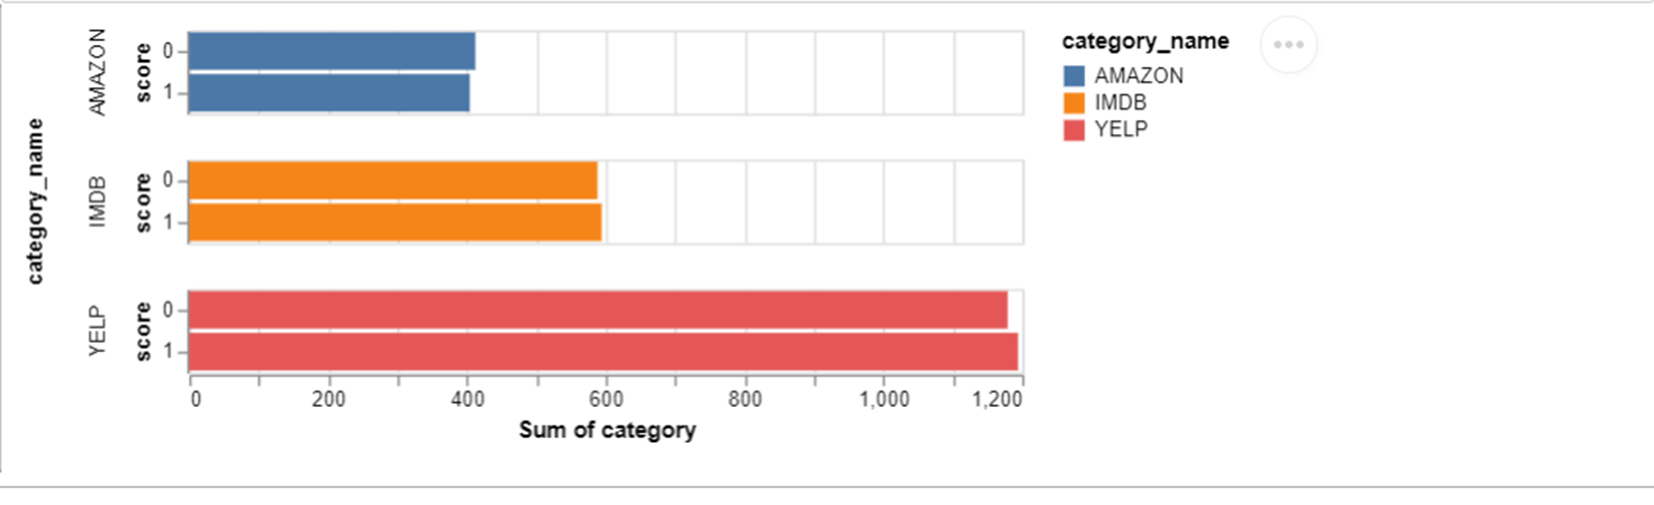